# Base

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox

# Machine learning libraries
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import ipywidgets as widgets
from IPython.display import display, clear_output



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# card_df = pd.read_csv('/content/drive/MyDrive/Variant III.csv')
# card_org = card_df.copy()

In [ ]:
#import data
card_df = pd.read_csv('/Users/xiaofanjiao/Desktop/Variant III.csv')
card_org = card_df.copy()


## 1. Data Processing

In [ ]:

# Selecting the desired variables
selected_variables = ['fraud_bool','income', 'name_email_similarity', 'prev_address_months_count',
                      'current_address_months_count', 'customer_age',
                      'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
                      'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free',
                      'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'foreign_request',
                      'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w']

# Creating a new dataset with selected variables
new_dataset = card_org[selected_variables].copy()
print(new_dataset.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.5               0.489311                         24   
1           0     0.9               0.535394                         -1   
2           0     0.5               0.188964                         -1   
3           0     0.4               0.391397                         29   
4           0     0.1               0.592711                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            20            50            0.019819   
1                            82            40            0.007959   
2                            73            60            0.027117   
3                             5            20            0.021103   
4                           267            40            0.039380   

   intended_balcon_amount  zip_count_4w  velocity_6h  ...  credit_risk_score  \
0               -0.857899          1842  1035.647957  

## 2.Seperate catergorical or numerical


In [ ]:
categorical_data = new_dataset[['email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards',
                                'foreign_request', 'keep_alive_session']]
numerical_data = new_dataset[['income', 'name_email_similarity', 'prev_address_months_count',
                              'current_address_months_count',
                              'customer_age', 'days_since_request', 'intended_balcon_amount',
                              'zip_count_4w', 'velocity_6h',
                             'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
                             'credit_risk_score', 'bank_months_count',
                             'session_length_in_minutes', 'device_distinct_emails_8w']]

In [ ]:
# # Plotting histograms for each variable
# for column in numerical_data.columns:
#     plt.figure(figsize=(8, 6))
#     plt.hist(numerical_data[column], bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()


### Scale only numerical Data

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Convert the scaled data back to a dataframe
scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)

# Print the first five rows of the scaled data
scaled_numerical_data.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,session_length_in_minutes,device_distinct_emails_8w
0,0.500,0.489311,0.0625,0.048837,0.500,0.000259,0.115865,0.276884,0.071460,0.000000,0.025641,0.580531,0.000000,0.033189,0.666667
1,1.000,0.535394,0.0000,0.193023,0.375,0.000104,0.110396,0.186494,0.399812,0.074464,0.179487,0.683186,0.636364,0.244555,0.666667
2,0.500,0.188964,0.0000,0.172093,0.625,0.000354,0.115558,0.164536,0.569473,0.000421,0.102564,0.500885,0.000000,0.031445,0.666667
3,0.375,0.391397,0.0750,0.013953,0.125,0.000276,0.118860,0.133404,0.577778,0.008414,0.358974,0.743363,0.090909,0.036416,0.666667
4,0.000,0.592711,0.0000,0.623256,0.375,0.000514,0.248779,0.089938,0.467931,0.002524,0.358974,0.591150,0.878788,0.175639,0.666667


In [ ]:
# combine scaled_numerical_data with categorical_data
combined_data = pd.concat([scaled_numerical_data, categorical_data], axis=1)
combined_data.head()


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,bank_branch_count_8w,...,credit_risk_score,bank_months_count,session_length_in_minutes,device_distinct_emails_8w,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session
0,0.500,0.489311,0.0625,0.048837,0.500,0.000259,0.115865,0.276884,0.071460,0.000000,...,0.580531,0.000000,0.033189,0.666667,0,0,1,0,0,0
1,1.000,0.535394,0.0000,0.193023,0.375,0.000104,0.110396,0.186494,0.399812,0.074464,...,0.683186,0.636364,0.244555,0.666667,0,0,1,0,0,1
2,0.500,0.188964,0.0000,0.172093,0.625,0.000354,0.115558,0.164536,0.569473,0.000421,...,0.500885,0.000000,0.031445,0.666667,1,1,1,0,0,1
3,0.375,0.391397,0.0750,0.013953,0.125,0.000276,0.118860,0.133404,0.577778,0.008414,...,0.743363,0.090909,0.036416,0.666667,1,1,1,0,0,1
4,0.000,0.592711,0.0000,0.623256,0.375,0.000514,0.248779,0.089938,0.467931,0.002524,...,0.591150,0.878788,0.175639,0.666667,1,0,1,0,0,0


## Fit into Model

In [ ]:
# Preparing the data
x_variable = combined_data
y_variable = new_dataset['fraud_bool']

## Logistic Regression

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2, random_state=42)

# Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fitting the Logistic Regression model on the resampled training set
logistic_model = LogisticRegression(max_iter=100, solver='newton-cholesky', random_state=42, verbose=1)

# model = RandomForestClassifier(
#         max_depth=5, n_estimators=100, max_features='sqrt', random_state=42)

# model = GaussianNB()

logistic_model.fit(X_resampled, y_resampled)

# Making predictions on the test set using the Logistic Regression model
logistic_predictions = logistic_model.predict(X_test)

Newton iter=1
  Check Convergence
    1. max |gradient| 0.0116610232352018 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.0018999559735633235 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 8.10465346495489e-05 <= 0.0001
    2. Newton decrement 0.00039874152036949823 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 1.8279837901292256e-07 <= 0.0001
    2. Newton decrement 8.206682452000926e-07 <= 0.0001
  Solver did converge at loss = 0.5076242334967301.


In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, logistic_predictions)
precision_lr = precision_score(y_test, logistic_predictions)
recall_lr = recall_score(y_test, logistic_predictions)
f1_lr = f1_score(y_test, logistic_predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Logistic Regression vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_lr:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_lr:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_lr:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_lr:.4f} vs {f1_dummy:.4f}")

Logistic Regression vs Dummy Classifier
---------------------------------------
Accuracy:  0.7446 vs 0.9889
Precision: 0.0301 vs 0.0000
Recall:    0.7071 vs 0.0000
F1 Score:  0.0577 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

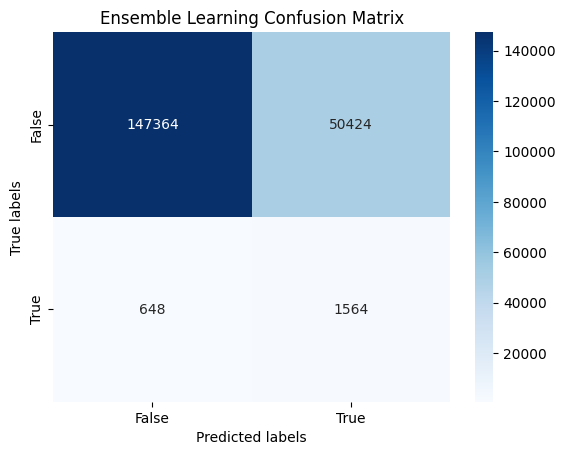

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_lg = confusion_matrix(y_test, logistic_predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_lg, annot=True, fmt="d", cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()

In [ ]:
conf_matrix_lg

array([[147364,  50424],
       [   648,   1564]])

### Top Features

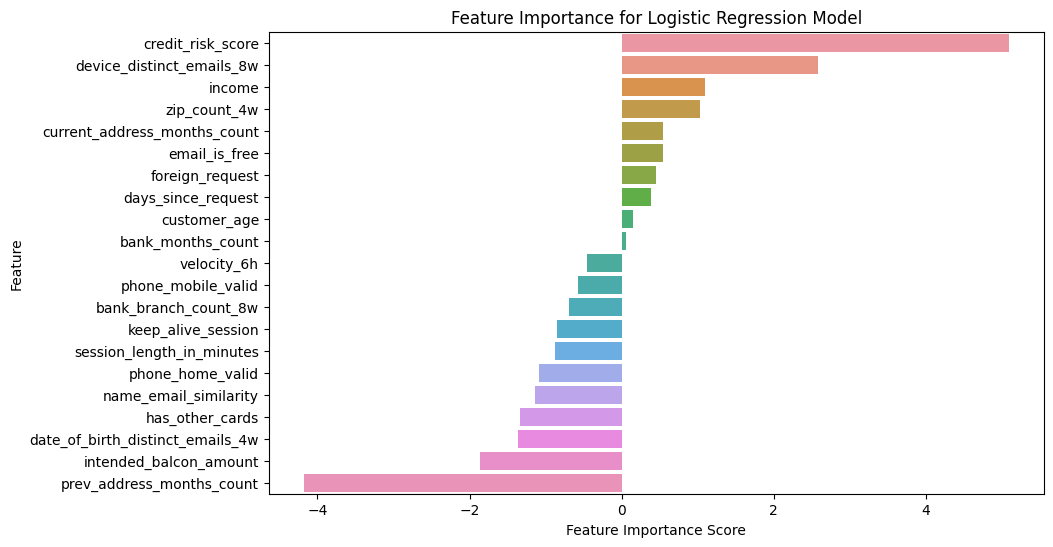

In [ ]:
feature_importance = pd.Series(logistic_model.coef_[0], index=x_variable.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance for Logistic Regression Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
feature_importance.head(10)

credit_risk_score               5.086661
device_distinct_emails_8w       2.584412
income                          1.095381
zip_count_4w                    1.024621
current_address_months_count    0.545386
email_is_free                   0.543514
foreign_request                 0.454592
days_since_request              0.383899
customer_age                    0.152045
bank_months_count               0.057456
dtype: float64

### ROC

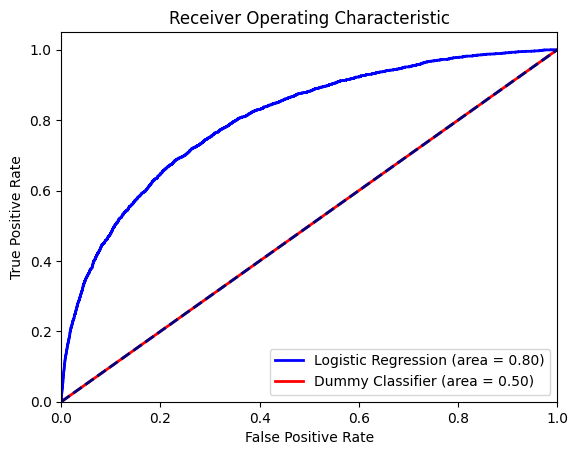

In [ ]:
# Obtain the probabilities for the Logistic Regression model
lr_probs = logistic_model.predict_proba(X_test)[:, 1]

# For the Dummy Classifier, since it predicts the most frequent class,
# its probability distribution might be degenerate (all zeros or all ones).
# Here we take the probability of the positive class.
dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and ROC area for Dummy Classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label='Dummy Classifier (area = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2, random_state=42)

# Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fitting the Random Forest model on the resampled training set
random_forest_model = RandomForestClassifier(max_depth=5, n_estimators=100, max_features='sqrt', random_state=42)
random_forest_model.fit(X_resampled, y_resampled)

# Making predictions on the test set using the Random Forest model
rf_predictions = random_forest_model.predict(X_test)


In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Random Forest model
accuracy_rf = accuracy_score(y_test, rf_predictions)
precision_rf = precision_score(y_test, rf_predictions)
recall_rf = recall_score(y_test, rf_predictions)
f1_rf = f1_score(y_test, rf_predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Random Forest vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_rf:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_rf:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_rf:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_rf:.4f} vs {f1_dummy:.4f}")

Random Forest vs Dummy Classifier
---------------------------------------
Accuracy:  0.7924 vs 0.9889
Precision: 0.0345 vs 0.0000
Recall:    0.6587 vs 0.0000
F1 Score:  0.0656 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

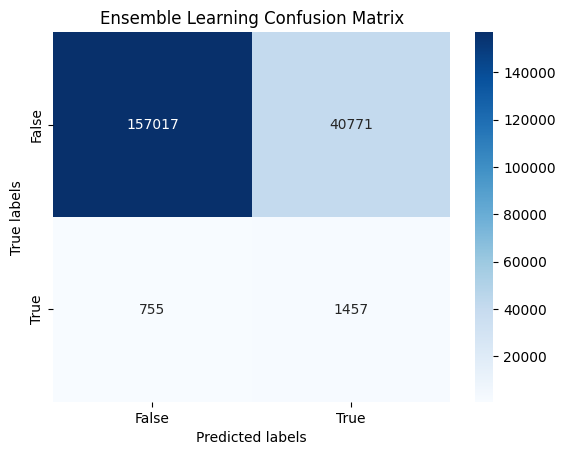

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()

In [ ]:
conf_matrix_rf

array([[157017,  40771],
       [   755,   1457]])

### Top Features

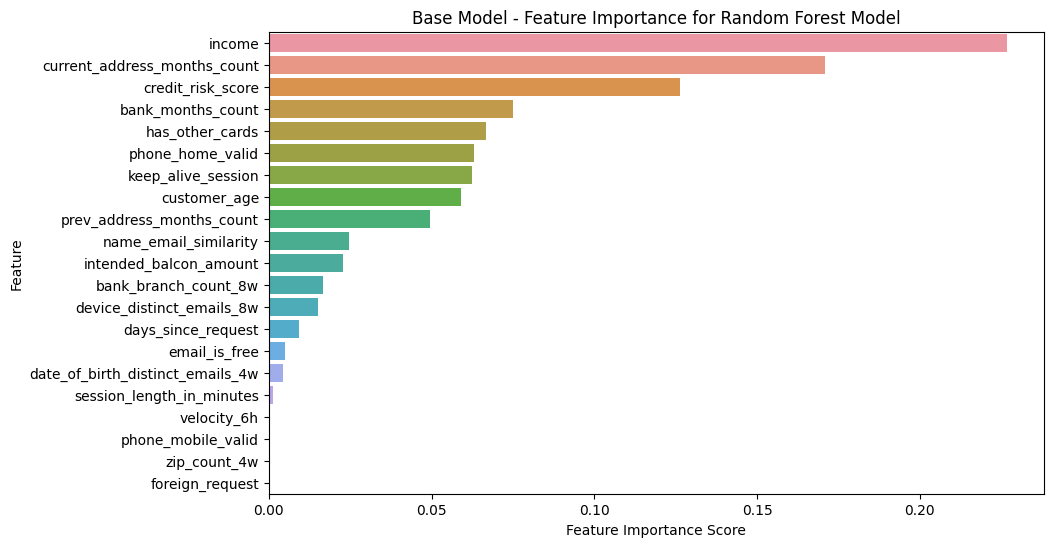

In [ ]:
feature_importance_rf = pd.Series(random_forest_model.feature_importances_, index=x_variable.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index)
plt.title('Base Model - Feature Importance for Random Forest Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
feature_importance_rf.head(10)

income                          0.226761
current_address_months_count    0.170802
credit_risk_score               0.126469
bank_months_count               0.075050
has_other_cards                 0.066632
phone_home_valid                0.063137
keep_alive_session              0.062438
customer_age                    0.058959
prev_address_months_count       0.049654
name_email_similarity           0.024649
dtype: float64

### ROC

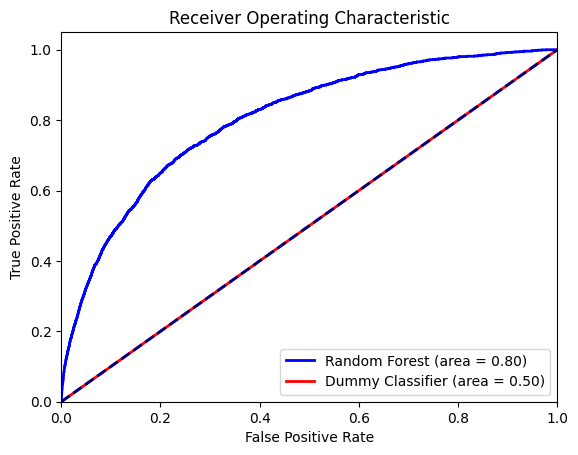

In [ ]:
# Obtain the probabilities for the Random Forest model
rf_probs = random_forest_model.predict_proba(X_test)[:, 1]

# For the Dummy Classifier, as before, we take the probability of the positive class
dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and ROC area for Dummy Classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label='Dummy Classifier (area = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2, random_state=42)

# Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fitting the Gaussian Naive Bayes model on the resampled training set
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_resampled, y_resampled)

# Making predictions on the test set using the Gaussian Naive Bayes model
nb_predictions = naive_bayes_model.predict(X_test)


In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Gaussian Naive Bayes model
accuracy_nb = accuracy_score(y_test, nb_predictions)
precision_nb = precision_score(y_test, nb_predictions)
recall_nb = recall_score(y_test, nb_predictions)
f1_nb = f1_score(y_test, nb_predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Naive Bayes vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_nb:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_nb:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_nb:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_nb:.4f} vs {f1_dummy:.4f}")

Naive Bayes vs Dummy Classifier
---------------------------------------
Accuracy:  0.6716 vs 0.9889
Precision: 0.0237 vs 0.0000
Recall:    0.7125 vs 0.0000
F1 Score:  0.0458 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

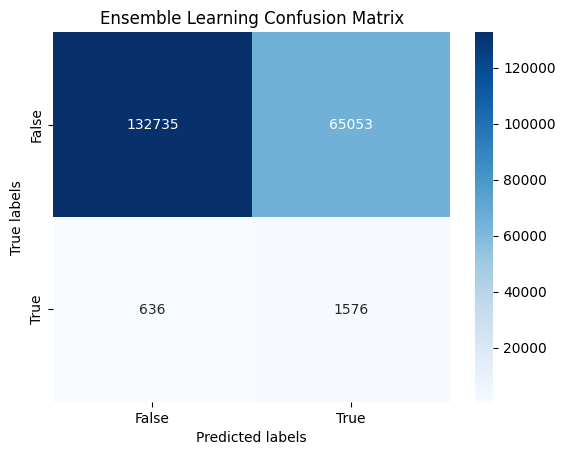

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()

In [ ]:
conf_matrix_nb

array([[132735,  65053],
       [   636,   1576]])

### ROC

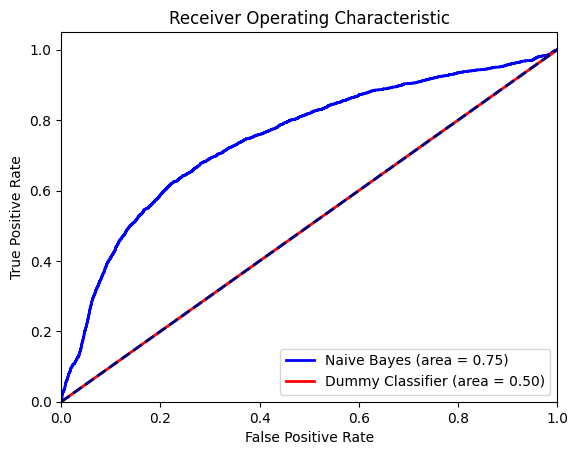

In [ ]:
# Obtain the probabilities for the Gaussian Naive Bayes model
nb_probs = naive_bayes_model.predict_proba(X_test)[:, 1]

# For the Dummy Classifier, as before, we take the probability of the positive class
dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Gaussian Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Compute ROC curve and ROC area for Dummy Classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label='Dummy Classifier (area = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Ensemble

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2,random_state=42)

# Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Constructing an ensemble model
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    return pd.DataFrame(predictions).mode().iloc[0]

# Making predictions on the test set
ensemble_models = [logistic_model, random_forest_model, naive_bayes_model]
predictions = ensemble_predict(ensemble_models, X_test)

In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_ensemble = accuracy_score(y_test, predictions)
precision_ensemble = precision_score(y_test, predictions)
recall_ensemble = recall_score(y_test, predictions)
f1_ensemble = f1_score(y_test, predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Ensemble Learning vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_ensemble:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_ensemble:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_ensemble:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_ensemble:.4f} vs {f1_dummy:.4f}")

Ensemble Learning vs Dummy Classifier
---------------------------------------
Accuracy:  0.7484 vs 0.9889
Precision: 0.0308 vs 0.0000
Recall:    0.7134 vs 0.0000
F1 Score:  0.0590 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

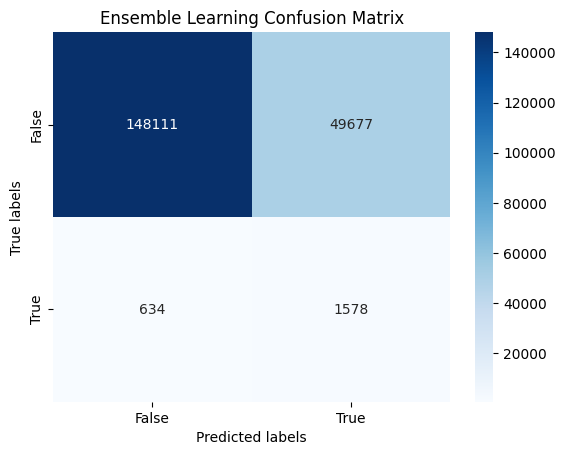

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_el = confusion_matrix(y_test, predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_el, annot=True, fmt="d", cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()

In [ ]:
conf_matrix_el

array([[148111,  49677],
       [   634,   1578]])

### Top Features

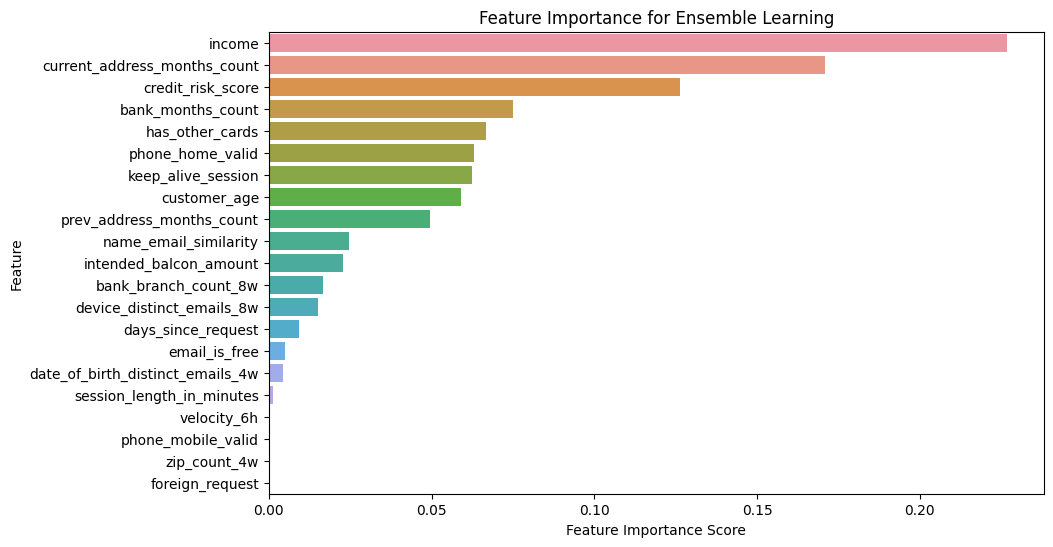

In [ ]:
# Filter ensemble_models to include only models with feature_importances_ attribute
models_with_feature_importance = [model for model in ensemble_models if hasattr(model, 'feature_importances_')]

# Calculate feature importance
feature_importance_ensemble = pd.Series(np.mean([model.feature_importances_ for model in models_with_feature_importance], axis=0),
                                        index=x_variable.columns).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_ensemble, y=feature_importance_ensemble.index)
plt.title('Feature Importance for Ensemble Learning')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

ROC AUC: 0.804


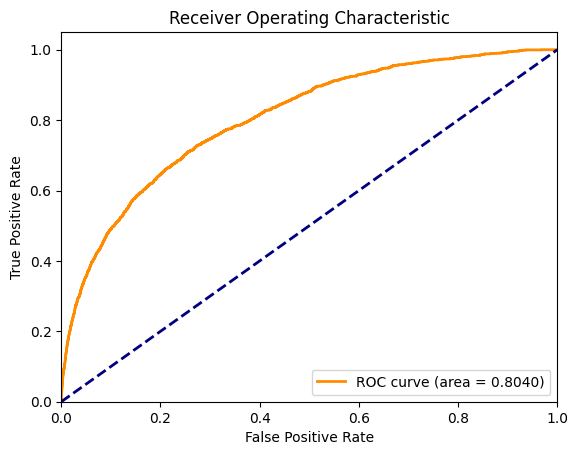

In [ ]:
# Modified ensemble predict to average probabilities
def ensemble_predict_proba(models, X):
    # Ensure all models have a predict_proba method
    if not all(hasattr(model, 'predict_proba') for model in models):
        raise ValueError("All models must have a predict_proba method")

    # Averaging predicted probabilities
    predictions_proba = np.mean([model.predict_proba(X)[:, 1] for model in models], axis=0)
    return predictions_proba

# Predict probabilities for the test set
probabilities = ensemble_predict_proba(ensemble_models, X_test)

# Compute ROC AUC
roc_auc = round(roc_auc_score(y_test, probabilities), 3)
print(f"ROC AUC: {roc_auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Evaluate

Logistic Regression vs Dummy Classifier
---------------------------------------
Accuracy:  0.7446 vs 0.9889
Precision: 0.0301 vs 0.0000
Recall:    0.7071 vs 0.0000
F1 Score:  0.0577 vs 0.0000

Random Forest vs Dummy Classifier
---------------------------------------
Accuracy:  0.7924 vs 0.9889
Precision: 0.0345 vs 0.0000
Recall:    0.6587 vs 0.0000
F1 Score:  0.0656 vs 0.0000

Naive Bayes vs Dummy Classifier
---------------------------------------
Accuracy:  0.6716 vs 0.9889
Precision: 0.0237 vs 0.0000
Recall:    0.7125 vs 0.0000
F1 Score:  0.0458 vs 0.0000

Ensemble Learning vs Dummy Classifier
---------------------------------------
Accuracy:  0.7484 vs 0.9889
Precision: 0.0308 vs 0.0000
Recall:    0.7134 vs 0.0000
F1 Score:  0.0590 vs 0.0000

## Visualize

In [ ]:
# Define function to get metrics
def get_metrics(model_name, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Define function to plot ROC curve and display metrics
def plot_roc_and_display_metrics(selected_models):
    metrics_data = []
    plt.figure(figsize=(8, 6))

    for model_name in selected_models:
        if model_name == 'Logistic Regression':
            probs = logistic_model.predict_proba(X_test)[:, 1]
            color = 'blue'
            predictions = logistic_model.predict(X_test)
        elif model_name == 'Random Forest':
            probs = random_forest_model.predict_proba(X_test)[:, 1]
            color = 'green'
            predictions = random_forest_model.predict(X_test)
        elif model_name == 'Naive Bayes':
            probs = naive_bayes_model.predict_proba(X_test)[:, 1]
            color = 'orange'
            predictions = naive_bayes_model.predict(X_test)
        elif model_name == 'Ensemble Learning':
            probs = ensemble_predict_proba(ensemble_models, X_test)
            predictions = ensemble_predict(ensemble_models, X_test)
            color = 'red'

        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, label=f'{model_name} (area = {roc_auc:.4f})')

        accuracy, precision, recall, f1 = get_metrics(model_name, predictions)
        metrics_data.append([model_name, accuracy, precision, recall, f1, roc_auc])

    # Plot ROC Curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Base Method Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Display Metrics Table
    metrics_df = pd.DataFrame(metrics_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    display(metrics_df)

# Widget setup
select_models = widgets.SelectMultiple(
    options=['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble Learning'],
    value=['Logistic Regression'],
    description='Models',
    disabled=False
)

output = widgets.Output()

def on_model_change(change):
    with output:
        clear_output(wait=True)
        plot_roc_and_display_metrics(change.new)

select_models.observe(on_model_change, names='value')

display(select_models, output)


SelectMultiple(description='Models', index=(0,), options=('Logistic Regression', 'Random Forest', 'Naive Bayes…

Output()

## Feature Importance

In [ ]:
# Rename output widget for feature importance
output_feature_importance = widgets.Output()

# Function to plot feature importance
def plot_feature_importance(model_name, top_features):
        if model_name == 'Logistic Regression':
            feature_importance = pd.Series(logistic_model.coef_[0], index=x_variable.columns).sort_values(ascending=False)
            title = 'Base Method - Feature Importance for Logistic Regression Model'
        elif model_name == 'Random Forest':
            feature_importance = pd.Series(random_forest_model.feature_importances_, index=x_variable.columns).sort_values(ascending=False)
            title = 'Base Method - Feature Importance for Random Forest Model'
        else:
            return

        if top_features != 'All':
            feature_importance = feature_importance.head(int(top_features))

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importance, y=feature_importance.index)
        plt.title(title)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Feature')
        plt.show()
# Update the names of the model_selector and feature_count_selector if they conflict with other parts of your code
model_selector_feature_importance = widgets.ToggleButtons(
    options=['Logistic Regression', 'Random Forest'],
    description='Algorithm:',
)

feature_count_selector_feature_importance = widgets.ToggleButtons(
    options=['5', '10', 'All'],
    description='Top Features:',
)

def on_feature_importance_change(change):
    with output_feature_importance:
        clear_output(wait=True)
        plot_feature_importance(change.new, feature_count_selector_feature_importance.value)

# Attach the event handler to the new selection buttons
model_selector_feature_importance.observe(on_feature_importance_change, names='value')
feature_count_selector_feature_importance.observe(on_feature_importance_change, names='value')

# Display the widgets
display(widgets.VBox([model_selector_feature_importance, feature_count_selector_feature_importance, output_feature_importance]))

## Common Top columns of top 10

income
current_address_months_count
credit_risk_score
bank_months_count
customer_age

This notebook compares the performance of different machine learning models for predicting a binary outcome.

1. **Data Preparation:**
   - The notebook assumes you have a dataset with features and a target variable.
   - It splits the data into training and testing sets.
   - It applies SMOTE to oversample the minority class.

2. **Model Training and Evaluation:**
   - It trains four models: Logistic Regression, Random Forest, Naive Bayes, and an Ensemble model.
   - For each model, it calculates accuracy, precision, recall, F1 score, and confusion matrix.

3. **ROC Curve and AUC:**
   - It plots the ROC curve for each model and calculates the area under the curve (AUC).

4. **Feature Importance:**
   - For the Logistic Regression and Random Forest models, it calculates feature importance and displays it in a bar plot.

5. **Model Comparison:**
   - It compares the metrics of all models and shows the results in a table.
   - It also allows you to select specific models to compare their ROC curves.

6. **Feature Importance Comparison:**
   - It allows you to select a model and the number of top features to display their importance.

Overall, the notebook provides a comprehensive analysis of different machine learning models for binary classification, including model performance evaluation, ROC curve analysis, and feature importance exploration.